<center>
    <h1>
Reconstruction of DOSY NMR signals
    </h1>
</center>


<center>
Alejando de la Concha Duarte &emsp;&emsp;&emsp; Ana Escobar
</center>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import copy
import time
from numpy import linalg as LA
from scipy import linalg as LAS
from scipy.stats import multivariate_normal
import copy
from scipy.special import lambertw

In [2]:
path_to_data=os.getcwd()+"\\x.txt"
os.getcwd()

'C:\\Users\\Ana Julia\\Desktop\\MVA\\Opti2\\Tps\\Tp2'

## Generation of syntatic data 
1\. Dowload on the website the difusion signal $\bar{x} \in\mathbb{R}^N$, with size $N=200$

In [3]:
signal=open("x.txt","r")
signal=signal.readlines()
signal=[float(x.split("\n")[0]) for x in signal]
signal=np.array(signal)

2\. Create $T$ using an exponential sampling strategy :
\begin{equation*}
\left(\forall n\in\{1,\dots,N\}\right)\qquad T^{(n)}=T_{\min}\exp\left(-(n-1)\dfrac{\log(T_{\min/T_{\max}}}{N-1}\right),
\end{equation*}
with $T_{\min}=1$ and $T_{\max}=1000$

In [4]:
N=200
n=np.arange(1,N+1)
T_min=1
T_max=1000

In [5]:
T=T_min*np.exp(-1.*(n-1)*(np.log(T_min/T_max)/(N-1)))

3\. Display the original signal $\bar{x}$ as a function of $T$ (use log scale on the horizontal axis).

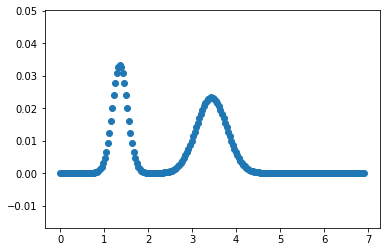

In [6]:
plt.scatter(np.log(T),signal)

4\. Create $t$ using a regular sampling strategy:
\begin{equation}
\left(\forall m\in\{1,\dots,M\}\right)\qquad t^{(m)}=t_{\min}+\frac{m-1}{M-1}\left(t_{\max}-t_{\min}\right),
\end{equation}
with $M=50, t_{\min}=0, t_{\max}=1.5$

In [7]:
t_min=0
t_max=1.5
M=50
m=np.arange(1,M+1)
t=t_min+(m-1)/(M-1)*(t_max-t_min)

5\. Construct matrix $K\in\mathbb{R}^{MxN}$  using the following equation:
\begin{equation}
\left(\forall m\in\{1,\dots,M\}\right)\left(\forall n\in\{1,\dots,N\}\right)\qquad K^{(m,n)}=\exp(-T^{n}t^(m)
\end{equation}


In [8]:
K=np.zeros((M,N))

for i in range(M):
    for j in range(N):
        K[i,j]=np.exp(-T[j]*t[i])


6\.Simulate the noisy data according to model the above, by taking $w\sim\mathcal{N}(0,\sigma^2\mathbb{I}_M)$ with $\sigma=0.01z^{(1)}$, where $z = K\bar{x}.$
\begin{equation}
y=K\bar{x}+w,
\end{equation}
where $\bar{x}\in\mathbb{R}^N$ is the sought signal related to $\left(\mathcal{X}(T^{(n)})\right)_{1\leq n\leq N}$ and $w\in\mathbb{R}^M$ is the perturbation noise

In [9]:
np.random.seed(172527)
y  = K.dot(signal)
y += np.random.multivariate_normal(np.zeros(M),(0.01**2)*np.eye(M))

In [10]:
#w=np.random.multivariate_normal(np.zeros(M),(0.01**2)*np.eye(M))
#y=K.dot(signal)+w

7\. Display the resulting noisy data y as a function of t

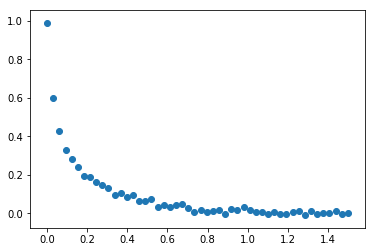

In [11]:
plt.scatter(t,y)

<div class="alert alert-block alert-info">
<b>Problem:</b> We propose here to find an estimate $\hat{x}\in \mathbb{R}^n$ of $\bar{x}$ by solving the following minimization problem, requiring the knowledge of $K$ and y:
\begin{equation}
    \hat{x}=\underset{x \in \mathbb{R}^N}{\operatorname{argmin}} \frac{1}{2}||Kx-y||^2+\beta g(x)\label{eq1}\tag{1} 
\end{equation}
</div>

## Comparison of regularization strategies

## Smothness prior 
In the first case, we define:


\begin{equation}
g(x)=\frac{1}{2}||Dx||^2 \qquad \forall x\in\mathbb{R}^N;
\end{equation}

where $D\in\mathbb{R}^{NxN}$ is the discrete gradient operator such that,

\begin{equation}
[Dx]^{n}=x^{(n)}-x^{(n-1)} \qquad \forall n=\{1,\dots,N\};
\end{equation}

with the circular convention $x^{(0)}=x^{(N)}$, such that we can rewrite ([1](#mjx-eqn-eq1)) as follows:

\begin{equation}\hat{x}=\underset{x \in \mathbb{R}^N}{\operatorname{argmin}} \frac{1}{2}||Kx-y||^2+\frac{\beta}{2} ||Dx||^2 \label{eq2}\tag{2} 
\end{equation}


**1. Discuss the existence and uniqueness of a solution to Problem ([2](#mjx-eqn-eq1))**

We note $F(x):=\frac{1}{2}||Kx-y||^2+\frac{\beta}{2} ||Dx||^2$, this function is differentiable and

\begin{align}
    \nabla F(x)& = K^\top (Kx-y)+\beta D^\top Dx, &    \nabla^2 F(x)&= K^\top K + \beta D^\top D.
\end{align}

We have that the function is strictly convexe since
\begin{align}
    x^\top( K^\top K+\beta D^\top D) \, x=0
\end{align}
Implies that $||Kx||^2+||Dx||^2 =0$ then $x \in \textbf{Ker}(K) \cap \textbf{Ker}(D)$. The elements of  $\textbf{Ker}(D)$ are of the form $\alpha*(1,\dots,1)$ by definition of D. Nevertheless, $K$ is defined as $K = \exp{(-t \otimes T)}$ forcing $\alpha=0$. 

Then $K^\top K+\beta D^\top D$ is a positive definite matrix and in consequence invertible. This proves that $F$ is strictly convex and the solution to the optimization problem is unique.  

**2. Propose an approach to solve problem ([2](#mjx-eqn-eq1))**

We can find the solution to the problem by using the following formula:

$$x=( K^\top K+\beta D^\top D)^{-1} K^\top y$$

**3. Implement it, and display the restored signal $\hat{x}$.**

In [12]:
def D(n):
    D=np.zeros((n,n))
    D[0,0]=1
    D[0,n-1]=1
    for i in range(1,n):
        D[i,i]=1
        D[i,i-1]=-1
    return(D)

In [13]:
def NQE(x_real,x_recons):
    #e=np.sum((x_real-x_recons)**2)/(np.sum(x_real**2))
    e=LA.norm(x_real-x_recons,2)/(LA.norm(x_real, 2))
    return(e)

In [14]:
def Close_Solution(y,K,beta):
    n=K.shape[1];    D_=D(n)
    M = D_.T.dot(D_);    M*= beta;    M+= K.T.dot(K)
    return LA.solve(M,K.T.dot(y))

The best regularization in this case is $\beta=1$. However, the recover image is not perfect: the solution fails to shrink the right tail of the reconstructed signal and both components have the same value in the y-axis. 

In [15]:
beta=[0.0001,0.01,0.1,1.,10.,100.,1000.,10000.,10000.]
solutions=[Close_Solution(y,K,x) for x in beta]
evaluations=[NQE(signal,x) for x in solutions]
evaluations

[19.951840653324638,
 1.3095889423808031,
 0.6641726471181002,
 0.38702407399695005,
 0.5762678258689519,
 0.669152784044086,
 0.749846114842339,
 0.7654550487550443,
 0.7654550487550443]

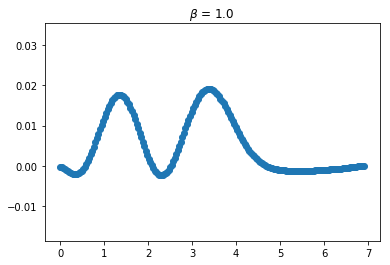

In [16]:
best_solution=solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)
plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]))
plt.show()

Now, we take values in the interval $[0.5,5]$. The best  value of $\beta$ is  $0.6$ which improves the reconstruction of the right tail of the signal.

Time to output features: 0.21880745887756348
Evaluation:0.36501438969065764


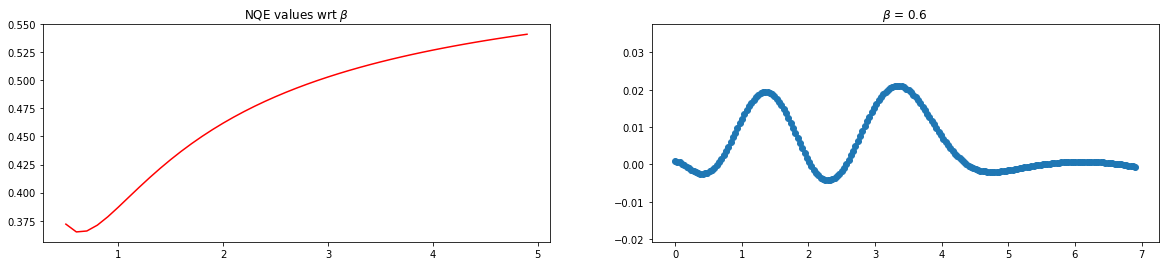

In [17]:
start = time.time()
beta       = np.arange(0.5, 5.0, 1/10.0)
solutions  = [Close_Solution(y,K,x) for x in beta]
evaluations= [NQE(signal,x) for x in solutions]
end = time.time()
print("Time to output features: " + str(end-start))
print('Evaluation:'+str(evaluations[np.argmin(evaluations)]))

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(beta,evaluations,'r')
plt.title('NQE values wrt '+r'$\beta$')

best_solution = solutions[np.argmin(evaluations)]
plt.subplot(1, 2, 2)
plt.scatter(np.log(T),best_solution)
plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]));    plt.show()


### Smoothness prior + constraints. 

The second case we have $g(x)=\frac{1}{2} ||Dx||^2 + i_{[x_{min},x_{max}]^N} (x)$, and the minimize problem ([1](#mjx-eqn-eq1)) is

\begin{align}
\hat{x} &= \underset{x \in \mathbb{R}^N}{\operatorname{argmin}} \frac{||Kx-y||^2}{2} + \frac{1}{2} ||Dx||^2 +  i_{[x_{min},x_{max}]^N} (x) \\ &= \underset{[x_{min},x_{max}]^N}{\operatorname{argmin}} \frac{||Kx-y||^2}{2} + \frac{1}{2} ||Dx||^2
\end{align}

The function is continuos in a compact set, then the problem has at least a solution. As the function is strictly convex according to the last question, the solution is unique.

It is easy to compute the proximity operator of the indicator function, it is the proyection operator. A good algorithm to solve the problem will be the projected gradient descent.

In [18]:
def gradient(x,y,K,D,beta):    return K.T.dot(K.dot(x)-y) + beta*(D.T.dot(D)).dot(x)

In [19]:
x_min=np.min(signal)
x_max=np.max(signal)

In [20]:
def grad_proy(x_0,y,K,beta,prec,x_min,x_max):
    D_=D(K.shape[1])
    V=(K.transpose()).dot(K)+beta*(D_.transpose()).dot(D_)
    v,e=np.linalg.eig(V)
    v=np.max(v)
    gamma=2./v
    l=2.-gamma*(v/2.)
    x_old=copy.deepcopy(x_0)
    z=x_old-gamma*gradient(x_old,y,K,D_,beta)
    x_new=x_old+l*(np.clip(z,x_min,x_max)-x_old)      
    while np.sqrt(np.sum((x_new-x_old)**2))>prec:       
        x_old=copy.deepcopy(x_new)
        z=x_old-gamma*gradient(x_old,y,K,D_,beta)
        x_new=x_old+l*(np.clip(z,x_min,x_max)-x_old)
        #print(np.sqrt(np.sum((x_new-x_old)**2)))
    return(x_new)
    

In [21]:
prec=1e-6
beta=[0.0001,0.001,0.01,0.1,1,10]
x_0=((x_max-x_min)/2)*np.ones(signal.shape[0])
solutions=[grad_proy(x_0,y,K,b,prec,x_min,x_max) for b in beta]
evaluations=[NQE(signal,x) for x in solutions]


Adding the constrains improves the quality of the recover signal compared to the last function. In this case the optimal value of $\beta$ is $0.1$. 

In [66]:
evaluations=[NQE(signal,x) for x in solutions]
print(evaluations)

[0.1894927408216543, 0.19010444999238574, 0.18466168619983808, 0.17454659493463145, 0.2573306524873079, 0.4541825518974266]


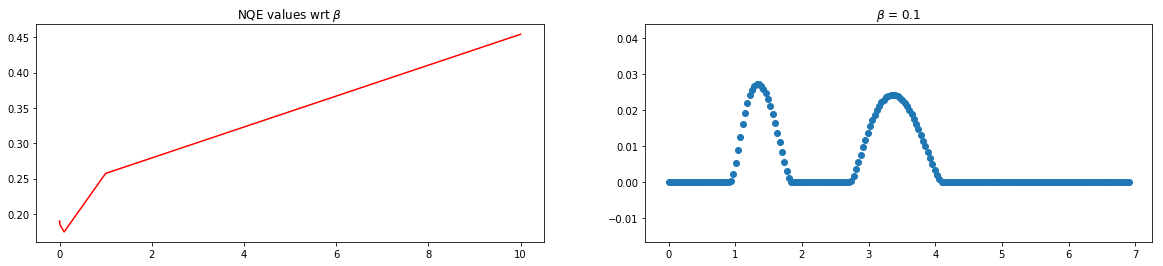

In [68]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(beta,evaluations,'r')
plt.title('NQE values wrt '+r'$\beta$')

plt.subplot(1, 2, 2)
best_solution = solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution);    plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]));    plt.show()

In addition, this algorithm has a computation time of $55.0398s$

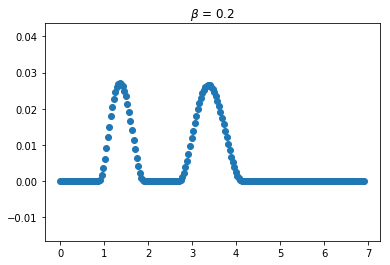

Time to output features: 354.19088792800903


In [33]:
start = time.time()
prec = 1e-8
beta = [0.2]#np.arange(0.1, 1, 1/10.0)
x_0  = np.repeat((x_max-x_min)/0.5, N)
solutions     = [grad_proy(x_0,y,K,b,prec,x_min,x_max) for b in beta]
evaluations   = [NQE(signal,x) for x in solutions]
best_solution = solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)
plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]))
plt.show()
end = time.time()
print("Time to output features: " + str(end-start))

In [34]:
print('Evaluation: '+str(evaluations[0]))

Evaluation: 0.19312960272193969


## Sparsity prior.
The next case, we consider the function:

\begin{equation}
g(x)=||x||_1
\end{equation}

We can define the problem ([1](#mjx-eqn-eq1)) as follows:

\begin{align}
\hat{x} &= \underset{x \in \mathbb{R}^N}{\operatorname{argmin}}\frac{||Kx-y||^2}{2} +  \beta||x||_1  
\end{align}

The function is the sum of two functions in $\Gamma_0(H)$, then it is in $\Gamma_0(H)$. The function to optimize is lowerbound by the norm L1 of x multiplied by $\beta$, then it is coercive. The problem has a solution. Aditionally if $K^T K$ is positive definite, the solution to the optimization problem would be unique. 

In [22]:
def gradient_2(x,y,K):
    grad=(K.transpose()).dot(K.dot(x)-y)
    return(grad)

def proy_2(x,c):
    proy=np.sign(x)*np.where((np.abs(x)-c)>0,np.abs(x)-c,0)
    return(proy)

In [23]:
def grad_proy_2(x_0,y,K,beta,prec):
    V=(K.transpose()).dot(K)
    v,e=np.linalg.eig(V)
    v=np.max(np.real(v))
    gamma=(2./v)*(4./5.)
    #gamma=(2./v)
    d=(2.-gamma*(v/2.))
    l=(d/2.)
    x_old=copy.deepcopy(x_0)
    z=x_old-gamma*gradient_2(x_old,y,K)
    x_new=x_old+l*(proy_2(z,beta*gamma)-x_old)     
    while np.sqrt(np.sum((x_new-x_old)**2))>prec:       
        x_old=copy.deepcopy(x_new)
        z=x_old-gamma*gradient_2(x_old,y,K)
        x_new=x_old+l*(proy_2(z,gamma*beta)-x_old)
        #print(np.sqrt(np.sum((x_new-x_old)**2)))
    return(x_new)

The optimization problem leads to a better solution when the paramenter $beta$ is set to $0.01$. 

In [24]:
prec=1e-6
beta=[0.001,0.01,0.1,1,10,100]
x_0=((x_max-x_min)/2)*np.ones(signal.shape[0])
solutions=[grad_proy_2(x_0,y,K,b,prec) for b in beta]

In [25]:
evaluations=[NQE(signal,x) for x in solutions]
print(evaluations)

[0.23123876756436565, 0.20083870912432641, 0.5582918248973466, 1.2512530207461476, 0.9999976992508164, 0.9999976992508164]


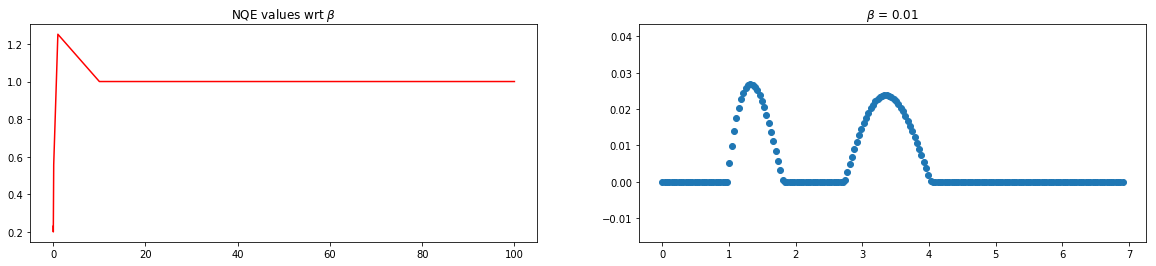

In [26]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(beta,evaluations,'r')
plt.title('NQE values wrt '+r'$\beta$')

plt.subplot(1, 2, 2)

best_solution=solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)
plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]))
plt.show()

In [ ]:
start = time.time()
prec=1e-8
beta=[0.01]
x_0=((x_max-x_min)/2)*np.ones(signal.shape[0])
solutions=[grad_proy_2(x_0,y,K,b,prec) for b in beta]
evaluations=[NQE(signal,x) for x in solutions]
#plt.scatter(np.log(T),best_solution)
end = time.time()
print("Time to output features: " + str(end-start))

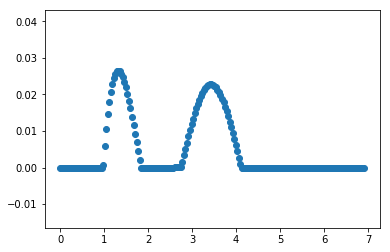

In [109]:
best_solution=solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)


# Maximum Entropy Regularization

$$x=\underset{x \in \mathbb{R}^N}{\operatorname{argmin}} \frac{||Kx-y||^2}{2} + \beta ent(x)$$

The function $\psi(x)=xlogx$ is clearly proper andlower semi-continuos. The second derivative of  $\psi''(x)=\frac{1}{x}$ is strictly positive over $]0,\infty]$ the it is strictly convex over this interval. The function is convex in all R cause its epigrah is a convex set. The function is not differentiable at 0. Aditionally we can see that it is coercive. 

We have that the function to minimize is in $\Gamma_0$ as it is the sum of two functions in $\Gamma_0$. Additionaly we have that:

$$\frac{||Kx-y||^2}{2}+ \beta ent(x) \geq \beta ent(x)$$

Then our objective function is coercive too. Then our problem has a solution. As the ent(x) function is stricly convex over $]0,\infty ]$, our objective function will be stricly convex over the interval, then we will have a unique solution to our problem. 



$prox_{\gamma ent}(x)=(prox_{\gamma \phi}(x_i))_{(i=1,2,..,n)}$

$prox_{\gamma \phi}(x)=\underset{u \in \mathbb{R}}{\operatorname{\inf}} \gamma*\phi(u) + \frac{||u-x||^2}{2}= \underset{u \in ]0,\infty]}{\operatorname{\inf}}\gamma*\phi(u) + \frac{||u-x||^2}{2}$ 

\begin{align}
\frac{\partial}{\partial u}\left(\frac{1}{2} ||u-x||^2+\gamma log(u)\right)&=-(x-u)+\gamma+\gamma log(u)\\
&=-\frac{x-u}{\gamma}+1+log(u) 
\end{align}
We look for the optimal solution when $\frac{x-u}{\gamma}+1+log(u)=0$ then
\begin{align}
\frac{u}{\gamma}+log(\frac{u}{\gamma})&=\frac{x}{\gamma}-1-log(\gamma)\\
&\Leftrightarrow \frac{u}{\gamma}exp({u/\gamma})=exp(\frac{x}{\gamma}-1-log(\gamma))\\
&\Leftrightarrow u=\gamma W(exp(\frac{x-\gamma}{\gamma}-log(\gamma)))
\end{align}

In [20]:
def Lambert_w(x):
    if x>=100:
        return(np.log(x))
    if x<=-20:
        return(0)
    if(x>-20 and x<100):
        branch=np.sign(x)
        if branch==1.:
            w=1.
        else:
            w=-2.
        v=1e6*w
    
        while((np.abs(w - v)/np.abs(w))>1e-8):
            v = w
            e = np.exp(v)
            f = v*e - x  
            w = v - f/((e*(v+1) - (v+2)*f/(2*v+2)))        
    return(w)      

In [21]:
Lambert_W = np.vectorize(Lambert_w)

## Forward-Backward

In [89]:
def gradient_2(x,y,K):
    grad=K.transpose().dot(K.dot(x)-y)
    return(grad)

def prox_2(x,c):
    #print(x)
    #print(np.exp(((x-c)/c)-np.log(c)))
    prox=c*Lambert_W(np.exp(((x-c)/c)-np.log(c)))
    return(prox)

def forward_backward(x_0,y,K,beta,prec):
    V=(K.transpose()).dot(K)
    v,e=np.linalg.eig(V)
    v=np.max(np.real(v))
    gamma=2./v
    l=2.-gamma*(v/2.)
    x_old=copy.deepcopy(x_0)
    z=x_old-gamma*gradient_2(x_old,y,K)
    x_new=x_old+l*(-x_old) 
    while np.sqrt(np.sum((x_new-x_old)**2))>prec:       
        x_old=copy.deepcopy(x_new)
        z=x_old-gamma*gradient_2(x_old,y,K)
        x_new=x_old+l*(prox_2(z,gamma*beta)-x_old)
        #print(np.sqrt(np.sum((x_new-x_old)**2)))
    return(x_new)


In [91]:
prec=1e-5
beta=[0.01,0.1,1,10]
x_0=np.ones(signal.shape[0])
solutions=[forward_backward(x_0,y,K,b,prec) for b in beta] 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [92]:
evaluations=[NQE(signal,x) for x in solutions]
evaluations

[0.38763214189341766, 1.3668117218835059, 4.417975196715303, 7.405454191704681]

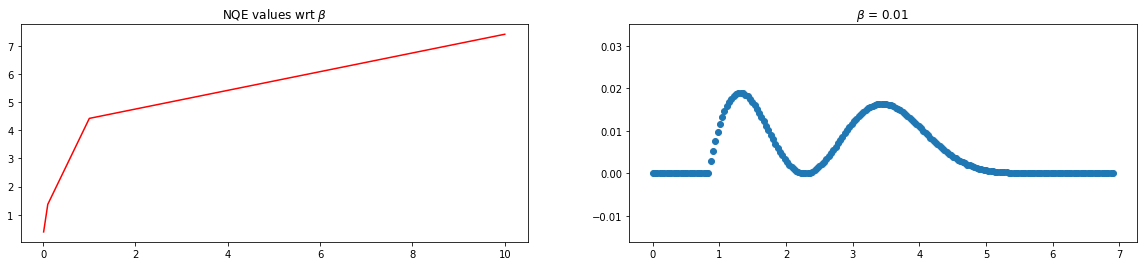

In [94]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(beta,evaluations,'r')
plt.title('NQE values wrt '+r'$\beta$')

plt.subplot(1, 2, 2)
best_solution=solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)
plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]))
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


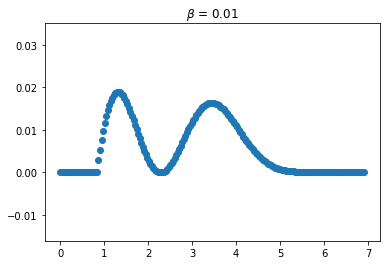

Time to output features: 3.4058985710144043
Evaluation:0.38763214189341766


In [99]:
start = time.time()
prec=1e-5
beta=[0.01]
x_0=np.ones(signal.shape[0])
solutions=[forward_backward(x_0,y,K,b,prec) for b in beta] 
evaluations=[NQE(signal,x) for x in solutions]
#evaluations
best_solution=solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)
plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]))
plt.show()
end = time.time()
print("Time to output features: " + str(end-start))
print('Evaluation:'+str(evaluations[0]))

## Douglas Rachford

In [102]:
#def prox_3(x_0,y,K,c):
 #   n=len(x_0)
  #  V=np.linalg.inv(np.eye(n)+c*(K.transpose().dot(K)))
   # return(V.dot(x_0+c*K.transpose().dot(y)))
def prox_3(x_0,y,K,c):
    V = K.T.dot(K)
    M = V.copy();    M *= c;    M += np.eye(n)
    return LA.solve(M, x_0 + c*K.T.dot(y))

def DouRach(x_0,y,K,gamma,beta,prec):
    x_old=copy.deepcopy(x_0)
    lamb=1.999999
    a=prox_2(x_old,gamma*beta)
    b=prox_3(2*a-x_old,y,K,gamma)
    x_new=x_old+lamb*(b-a)
   
    while np.sqrt(np.sum((x_new-x_old)**2))>prec:
        x_old=copy.deepcopy(x_new)
        a=prox_2(x_old,gamma*beta)
        b=prox_3(2*a-x_old,y,K,gamma)
        x_new=x_old+lamb*(b-a)
        #print(np.sqrt(np.sum((x_new-x_old)**2)))
    return(a)


In [103]:
prec=1e-7
beta=[0.001,0.01,0.1,1,10]
gamma=10
x_0=np.ones(signal.shape[0])
solutions=[DouRach(x_0,y,K,gamma,b,prec) for b in beta]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [ ]:
evaluations=[NQE(signal,x) for x in solutions]
evaluations

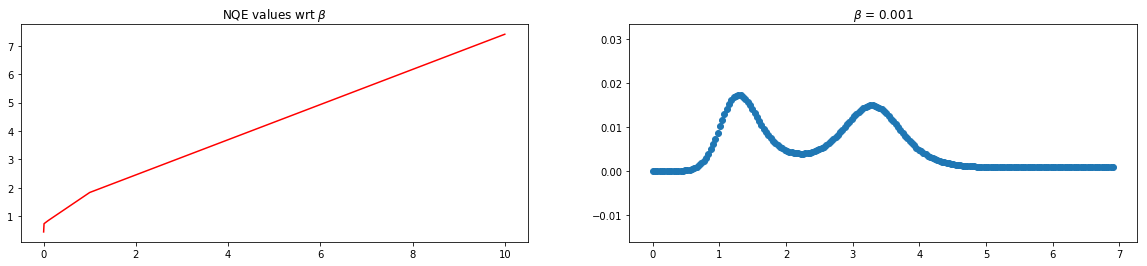

In [105]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(beta,evaluations,'r')
plt.title('NQE values wrt '+r'$\beta$')

plt.subplot(1, 2, 2)
best_solution=solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)
plt.title(r'$\beta$ = '+str(beta[np.argmin(evaluations)]))
plt.show()

The following code tries to improve our model by tuning also the parameter gamma. A high value of gammma seems to improve the performance of the Douglas-Rachford algorithm.

Time to output features: 2196.175332069397
Evaluation:[0.16916838300545053]


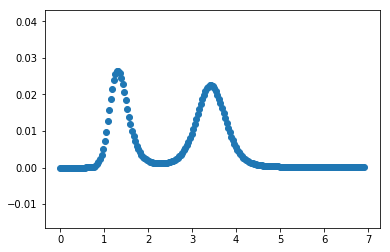

In [176]:
start = time.time()
prec=1e-7
beta=[0.0001]#,0.01,0.1,1,10]
gamma=10000
x_0=np.ones(signal.shape[0])
solutions=[DouRach(x_0,y,K,gamma,b,prec) for b in beta] 
evaluations=[NQE(signal,x) for x in solutions]
best_solution=solutions[np.argmin(evaluations)]
plt.scatter(np.log(T),best_solution)
end = time.time()
print("Time to output features: " + str(end-start))
print('Evaluation:'+str(evaluations))

With this strategy the normalized quadratic error decreases from $0.4718$ to $0.1694$

## PPXA

In [44]:
from scipy.special import lambertw
def prox_2(x,c):
    arg  = x.copy();    arg /= c;    arg -= 1.0
    return c*lambertw( np.exp( arg - np.log(c) ) ).real#c*lamb_w( np.exp( arg - np.log(c) ) )#c*lambertw( np.exp( arg - np.log(c) ) ).real

def proy_sphere(x,y,r):    return y + (x-y) * np.min([r/np.sqrt(np.sum((y-x)**2)),1])

In [43]:
def PPXA(x_0,K,data,eta,gamma=2,sigma=0.01,prec=1e-5):
    l=1.999999
    x_old=copy.deepcopy(x_0)
    y=copy.deepcopy(x_old)
    aux_inv=np.linalg.inv(np.eye(K.shape[1])+(K.transpose()).dot(K))
    
    v_old=aux_inv.dot(x_old[0]+(K.transpose()).dot(x_old[1]))
    y[0]=prox_2(x_old[0],gamma)
    y[1]=proy_sphere(x_old[1],data,sigma*np.sqrt(K.shape[0]*eta))
    c_n=aux_inv.dot(y[0]+(K.transpose()).dot(y[1]))
    x_new=copy.deepcopy(x_old)
    x_new[0]=x_old[0]+l*(2*c_n-v_old-y[0])
    x_new[1]=x_old[1]+l*(K.dot(2*c_n-v_old)-y[1])
    v_new=v_old+l*(c_n-v_old)
    i=1
    while np.sqrt(np.sum((v_new-v_old)**2))>prec:
        i+=1
        #if i%100000==0:
            #print(np.sqrt(np.sum((v_new-v_old)**2)))
        x_old=copy.deepcopy(x_new)
        v_old=copy.deepcopy(v_new)
        y[0]=prox_2(x_old[0],gamma)
        y[1]=proy_sphere(x_old[1],data,sigma*np.sqrt(K.shape[0]*eta))
        c_n=aux_inv.dot(y[0]+(K.transpose()).dot(y[1]))
        x_new[0]=x_old[0]+l*(2*c_n-v_old-y[0])
        x_new[1]=x_old[1]+l*(K.dot(2*c_n-v_old)-y[1])
        v_new=v_old+l*(c_n-v_old)
        
    return(v_new)


In [45]:
start = time.time()
x_0=[np.ones(K.shape[1]),np.ones(K.shape[0])]
solutions=PPXA(x_0,K,y,eta=1,gamma=2,sigma=0.01,prec=1e-6)
end = time.time()
print("Time to output features: " + str(end-start))

Time to output features: 1530.3959321975708


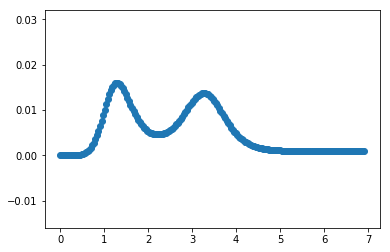

In [46]:
plt.scatter(np.log(T),solutions)

In [47]:
NQE(signal,solutions)

0.49427226215083897

## Conclusion
| Model                            | Algorithm              | $\beta$ | $\frac{||\hat{x}-\bar{x}||}{||\bar{x}||^2}$ | Time     |
|----------------------------------|------------------------|---------|---------------------------------------------|----------|
| Smoothness prior                 | Analytical Solution    | 0.6     | 0.3650                                      | 0.1525   |
| Smoothness prior  + constrainsts | Project gradient       | 0.2     | 0.1931                                      | 55.039   |
| Sparsity prior                   | Forward-Backward       | 0.01    | 0.1698                                      | 31.883   |
| Maximum entropy                  | Forward-Backward       | 0.01    | 0.3876                                      | 3.4058   |
| Maximum entropy                  | Douglas Rochford       | 0.001   | 0.1691                                      |2196.1753 |
| Maximum entropy                  | PPXA                   |         | 0.4                                         |1530.39   |

We can see how the Smoothness prior model is the one with the worst performance even if it has a close expression. The best one wrt. the error is the Douglas Rochford model an error to equal a $0.1691$ but it takes too much time to converge. We had to reduce the tolerence to 1e-6 to make it work. 

We were not able to make the PPXA algorithm to converge properly, the algorithm takes forever to converge 
